In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# custom seaborn plot options to make the figures pretty
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

# Time-Series Independence Tests

Especially in the realm of data such as fMRI images, identifying causality within time series data is difficult and often difficult and sometimes impossible to do among multivarate and nonlinear dependence modalities. We can formulate our approach to mitigate this problem as follow: Let $\mathbb{N}$ be the non-negative integers $\{0, 1, 2, ...\}$, and $\mathbb{R}$ be the real line $(-\infty, \infty)$. Let $F_X$, $F_Y$, and $F_{X,Y}$ represent the marginal and joint distributions of random variables $X$ and $Y$, whose realizations exist in $\mathcal{X}$ and $\mathcal{Y}$, respectively. Similarly, Let $F_{X_t}$, $F_{Y_s}$, and $F_{(X_t, Y_s)}$ represent the marginal and joint distributions of the time-indexed random variables $X_t$ and $Y_s$ at timesteps $t$ and $s$. For this work, assume $\mathcal{X} = \mathbb{R}^p$ and $\mathcal{Y} = \mathbb{R}^q$ for $p, q > 0$. Finally, let $\{(X_t, Y_t)\}_{t = -\infty}^{\infty}$ represent the full, jointly-sampled time series, structured as a countably long list of observations $(X_t, Y_t)$. Consider a strictly stationary time series $\{(X_t, Y_t)\}_{t = -\infty}^{\infty}$, with the observed sample $\{(X_1, Y_1), \ldots,(X_n, Y_n)\}$. Choose some $M \in \mathbb{N}$, the maximum_lag hyperparameter. We test the independence of two series via the following hypothesis.

\begin{align*}
    H_0: F_{(X_t,Y_{t-j})} &= F_{X_t} F_{Y_{t-j}} \text{ for each } j \in \{0, 1, ..., M\}\\
    H_A: F_{(X_t,Y_{t-j})} &\neq F_{X_t} F_{Y_{t-j}} \text{ for some } j \in \{0, 1, ..., M\}
\end{align*}

The null hypothesis implies that for any $(M+1)$-length stretch in the time series, $X_t$ is pairwise independent of present and past values $Y_{t-j}$ spaced $j$ timesteps away (including $j=0$). A corresponding test for whether $Y_t$ is dependent on past values of $X_t$ is available by swapping the labels of each time series. Finally, the hyperparameter $M$ governs the maximum number of timesteps in the past for which we check the influence of $Y_{t-j}$ on $X_t$. This $M$ can be chosen for computation considerations, as well as for specific subject matter purposes, e.g. a signal from one region of the brain might only influence be able to influence another within 20 time steps implies $M = 20$.

Importing tests from `hyppo` is similar to importing any other test.

In [2]:
from hyppo.time_series import MGCX, DcorrX
from hyppo.sims import indep_ar, cross_corr_ar, nonlinear_process

First, let's generate some simulated data. The independence simulations included take on required parameters number of samples with optional paramaters mentioned in the [reference](https://mgc.neurodata.io/reference/sims.html#time-series-simulations) section of the docs. There is also a `max_lag` parameter corresponding to the maximum difference between time points to test independence on.

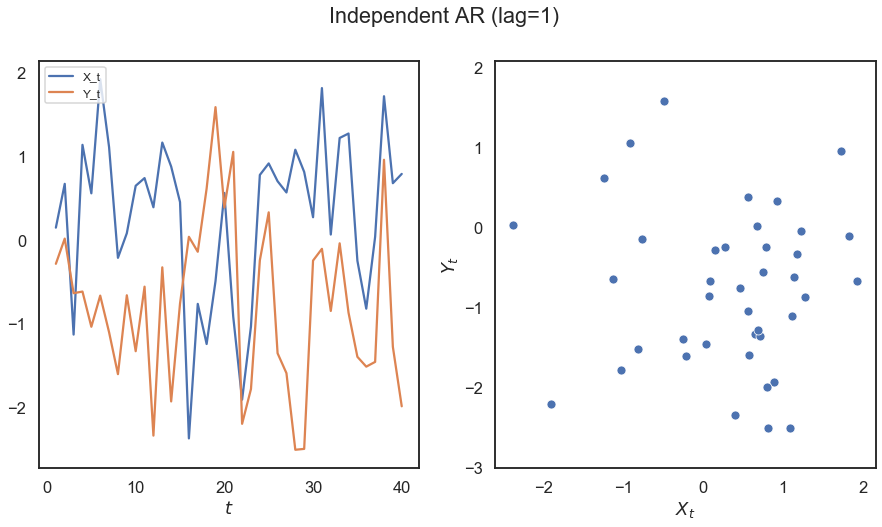

In [3]:
# hyppo code used to produce the simulation data
x, y = indep_ar(40)

# stuff to make the plot and make it look nice
n = x.shape[0]
t = range(1, n + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
sns.lineplot(t, x, ax=ax1)
sns.lineplot(t, y, ax=ax1)
sns.scatterplot(x, y, ax=ax2)
ax1.legend(['X_t', 'Y_t'], loc = 'upper left', prop={'size': 12})
ax1.set_xlabel(r'$t$')
ax2.set_xlabel(r'$X_t$') 
ax2.set_ylabel(r'$Y_t$')
fig.suptitle("Independent AR (lag=1)")
plt.axis('equal')
plt.show()

The test statistic the p-value is calculated by running the `.test` method. Some important parameters for the `.test` method:

  - `reps`: The number of replications to run when running a permutation test
  - `workers`: The number of cores to parallelize over when running a permutation test

Note that when using a permutation test, the lowest p-value is the reciprocal of the number of repetitions. Also, since the p-value is calculated with a random permutation test, there will be a slight variance in p-values with subsequent runs.

In [4]:
# test statistic and p-values can be calculated for MGC, so ...
stat, pvalue = MGCX(max_lag=0).test(x, y)

print("MGCX test statistic:", stat)
print("MGCX p-value:", pvalue)

MGCX test statistic: 0.0
MGCX p-value: 1.0


In [5]:
# or the parallelization can be used (-1 uses all cores)
stat, pvalue = MGCX(max_lag=0).test(x, y, workers=-1)

print("MGCX test statistic:", stat)
print("MGCX p-value:", pvalue)

MGCX test statistic: 0.0
MGCX p-value: 1.0


We can do the same thing for other kinds of time series processes the same methods.

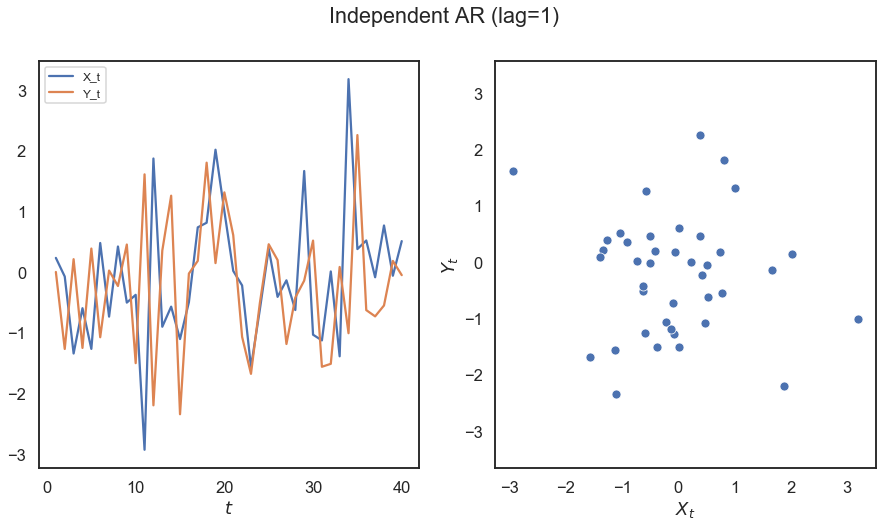

In [6]:
# hyppo code used to produce the simulation data
x, y = cross_corr_ar(40)

# stuff to make the plot and make it look nice
n = x.shape[0]
t = range(1, n + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
sns.lineplot(t, x, ax=ax1)
sns.lineplot(t, y, ax=ax1)
sns.scatterplot(x, y, ax=ax2)
ax1.legend(['X_t', 'Y_t'], loc = 'upper left', prop={'size': 12})
ax1.set_xlabel(r'$t$')
ax2.set_xlabel(r'$X_t$') 
ax2.set_ylabel(r'$Y_t$')
fig.suptitle("Independent AR (lag=1)")
plt.axis('equal')
plt.show()

In [7]:
stat, pvalue = DcorrX(max_lag=0).test(x, y)

print("DcorrX test statistic:", stat)
print("DcorrX p-value:", pvalue)

DcorrX test statistic: 0.0
DcorrX p-value: 1.0


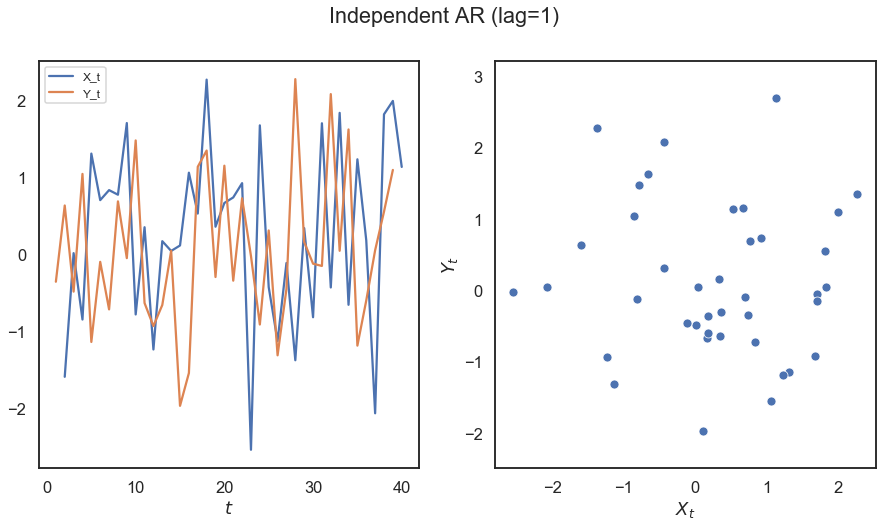

In [8]:
# hyppo code used to produce the simulation data
x, y = cross_corr_ar(40)

# stuff to make the plot and make it look nice
n = x.shape[0]
t = range(1, n + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7.5))
sns.lineplot(t[1:n], x[1:n], ax=ax1)
sns.lineplot(t[0:(n-1)], y[0:(n-1)], ax=ax1)
sns.scatterplot(x, y, ax=ax2)
ax1.legend(['X_t', 'Y_t'], loc = 'upper left', prop={'size': 12})
ax1.set_xlabel(r'$t$')
ax2.set_xlabel(r'$X_t$') 
ax2.set_ylabel(r'$Y_t$')
fig.suptitle("Independent AR (lag=1)")
plt.axis('equal')
plt.show()

In [9]:
stat, pvalue = DcorrX(max_lag=1).test(x, y, workers=-1)

print("DcorrX test statistic:", stat)
print("DcorrX p-value:", pvalue)

DcorrX test statistic: 0.11933511504916483
DcorrX p-value: 0.091
